In [2]:
import pandas as pd
import matplotlib 

df = pd.read_csv("presupuesto-ejecutado-2018-tercer-trimestre.csv",
                usecols = [ 'fun_desc','proy_desc','act_desc', 'inc_desc',
                            'ppal_desc', 'par_desc', 'spar_desc',
                            'sancion','vigente', 'definitivo',
                            'devengado'])

print("\nFila con mayor sancion:")
print(df[df['sancion']==df['sancion'].max()])

print("\nFila con mayor devengado:")
print(df[df['devengado']==df['devengado'].max()])


Fila con mayor sancion:
                           proy_desc                       act_desc  \
43083  Intereses De La Deuda Publica  Intereses De La Deuda Publica   

                                 fun_desc  \
43083  Deuda Pública – Intereses Y Gastos   

                                                inc_desc  \
43083  Servicio De La Deuda Y Disminución De Otros Pa...   

                          ppal_desc  \
43083  Servicio De La Deuda Interna   

                                          par_desc  \
43083  Intereses De La Deuda Interna A Largo Plazo   

                          spar_desc     sancion     vigente    definitivo  \
43083  Financiamiento Mercado Local  4008702080  9898627396  6.024583e+09   

          devengado  
43083  6.024583e+09  

Fila con mayor devengado:
                 proy_desc    act_desc            fun_desc  \
9028  Policía De La Ciudad  Conduccion  Seguridad Interior   

                inc_desc            ppal_desc               par_desc  \
9028  Gas

------------------------------------------------

Cantidad de proyectos agrupados por sancion:

MenorA1M: 42244 
MenorA5M: 5429 
MenorA10M: 1524 
MenorA1000M: 2842 
MenorA10000M: 14


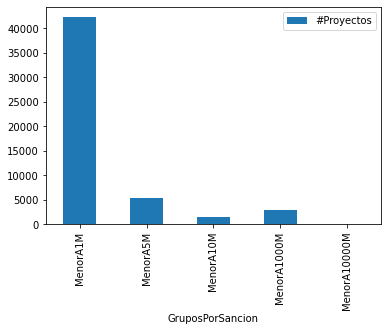

In [468]:
#PLOT BAR POR SANCION
MenorA1M = df[ (df['sancion'] <= 1000000)  ].index
MenorA5M = df[ (df['sancion'] > 1000000) & (df['sancion'] <= 5000000)  ].index
MenorA10M = df[ (df['sancion'] > 5000000) & (df['sancion'] <= 10000000)  ].index
MenorA1000M = df[ (df['sancion'] > 10000000) & (df['sancion'] <= 1000000000)  ].index
MenorA10000M = df[ (df['sancion'] > 1000000000) & (df['sancion'] <= 10000000000)  ].index

ProyectosMenorA1M = len(MenorA1M)
ProyectosMenorA5M = len(MenorA5M)
ProyectosMenorA10M = len(MenorA10M)
ProyectosMenorA1000M = len(MenorA1000M)
ProyectosMenorA10000M = len(MenorA10000M)

print("------------------------------------------------")
print("\nCantidad de proyectos agrupados por sancion:")
print("\nMenorA1M: " + str(len(MenorA1M)) + " \nMenorA5M: "
      + str(len(MenorA5M)) + " \nMenorA10M: "+ str(len(MenorA10M)) + " \nMenorA1000M: " + str(len(MenorA1000M)) +
      " \nMenorA10000M: " + str(len(MenorA10000M)) )

#df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
#ax = df.plot.bar(x='lab', y='val', rot=0)

dfSancion = pd.DataFrame({'GruposPorSancion' : [ 'MenorA1M', 'MenorA5M', 'MenorA10M', 'MenorA1000M', 'MenorA10000M'],
                          '#Proyectos': [ ProyectosMenorA1M, ProyectosMenorA5M, ProyectosMenorA10M,
                                          ProyectosMenorA1000M, ProyectosMenorA10000M]  })
ax = dfSancion.plot.bar(x = 'GruposPorSancion', y = '#Proyectos')


In [469]:
#DESVIOS/DIFERENCIAS DE PRESUPUESTOS
#Datos de color
#Inflacion en Julio 2018 : 3.1% menusal (fuente https://www.infobae.com/economia/2018/08/15/la-inflacion-de-julio-fue-31-y-el-acumulado-en-lo-que-va-del-ano-ya-suma-196-2/)
#Inflacion en Agosto 2018 : 3.9% mensual (fuente https://www.perfil.com/noticias/economia/la-inflacion-de-agosto-fue-del-39-por-ciento-y-acumula-243-en-el-ano.phtml)
#Inflacion en Septiembre 2018: 6.5% mensual (fuente https://www.lanacion.com.ar/economia/inflacion-nid2182584)
#A septiembre del 2018 la inflacion anual acumulo 32,4%

#Queremos ver dos desvios:
#Desvio/Diferencia 1 : (Devengado - Vigente) deberia ser siempre menor que 0 pues no podria obligar a pagar mas de lo que esta vigente
#Desvio/Diferencia 2: (Vigente - Sancion) seria la desviacion en el presupuesto original

#Nuestras interpretaciones sobre los campos de dinero
#sancion = "La autorizacion para gastar"
#vigente = "sancion mas/menos modificacion" pero el minimo es 0 , entonces nunca se gasto menos
#definitivo = "asignacion a un tercero"
#devengado = "presupuesto ejecutado"


#Agregamos los desvios al DataFrame
df['Desvio1'] = df['devengado'] - df['vigente']
df['Desvio2'] = df['vigente'] - df['sancion']

#MayorDesvio1
print("\nMayor diferencia entre devengado y vigencia: " + str(df['Desvio1'].max()))
#Quien fue el del mayor desvio?
print("\n Y el proyecto fue:")
print(df[df['Desvio1']==df['Desvio1'].max()])
#MayorDesvio2
print("\nMayor diferencia entre vigencia y sancion: " + str(df['Desvio2'].max()))
#Quien fue el del mayor desvio?
print("\n Y el proyecto fue:")
print(df[df['Desvio2']==df['Desvio2'].max()])


Mayor diferencia entre devengado y vigencia: 1413645438.83

 Y el proyecto fue:
                         proy_desc            act_desc           fun_desc  \
15704  Servicios De Higiene Urbana  Contrato De Basura  Servicios Urbanos   

                      inc_desc                             ppal_desc  \
15704  Servicios No Personales  Mantenimiento, Reparación Y Limpieza   

             par_desc       spar_desc    sancion    vigente    definitivo  \
15704  Higiene Urbana  Higiene Urbana  485440703  485440703  1.899086e+09   

          devengado       Desvio1  Desvio2  
15704  1.899086e+09  1.413645e+09        0  

Mayor diferencia entre vigencia y sancion: 11336187429

 Y el proyecto fue:
                 proy_desc    act_desc            fun_desc  \
9028  Policía De La Ciudad  Conduccion  Seguridad Interior   

                inc_desc            ppal_desc               par_desc  \
9028  Gastos En Personal  Personal Permanente  Retribución Del Cargo   

                  spar_desc

In [470]:
#PROYECTOS QUE NO GASTARON MAS DE LO VIGENTE
CantidadDeFilasTotales = df.shape[0]

ProyectosCuyaGastoFueMenorOIgualAlVigente = df[ ( df['devengado'] < df['vigente'] )  ].index
PorcentajeDeProyectosConMenorGasto = len(ProyectosCuyaGastoFueMenorOIgualAlVigente) * 100 / CantidadDeFilasTotales
print("\nCuantos proyectos no se pasaron de la vigencia?: " + str(len(ProyectosCuyaGastoFueMenorOIgualAlVigente))
      + " (" + str(round(PorcentajeDeProyectosConMenorGasto,3)) + "%)")

#PROYECTOS QUE GASTARON MAS DE LO VIGENTE
ProyectosCuyaGastoFueMayorAlVigente = df[ ( df['devengado'] > df['vigente'] )  ].index
PorcentajeDeProyectosConMayorGasto =  len(ProyectosCuyaGastoFueMayorAlVigente) * 100 / CantidadDeFilasTotales
print("\nCuantos proyectos se pasaron de la vigencia?: " + str(len(ProyectosCuyaGastoFueMayorAlVigente)) +
      " (" + str(round(PorcentajeDeProyectosConMayorGasto,3)) + "%)")

#PROYECTOS QUE MANTUVIERON SU VIGENCIA
ProyectosCuyaGastoFueIgualAlVigente = df[ ( df['devengado'] == df['vigente'] )  ].index
PorcentajeDeProyectosConVigencia = len(ProyectosCuyaGastoFueIgualAlVigente) * 100 / CantidadDeFilasTotales
print("\nCuantos proyectos mantuvieron la vigencia?: " + str(len(ProyectosCuyaGastoFueIgualAlVigente)) +
      " (" + str(round(PorcentajeDeProyectosConVigencia,3)) + "%)")


Cuantos proyectos no se pasaron de la vigencia?: 40875 (78.526%)

Cuantos proyectos se pasaron de la vigencia?: 236 (0.453%)

Cuantos proyectos mantuvieron la vigencia?: 10942 (21.021%)


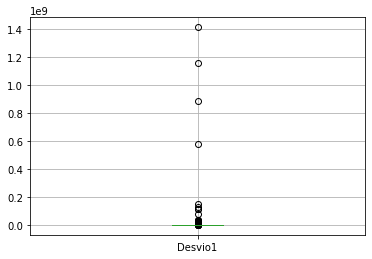

In [471]:
#QUE TANTO LE ERRA EL GOBIERNO DE LA CIUDAD PARA CALCULAR
# LA VIGENCIA CON RESPECTO A LO QUE SE TERMINA GASTANDO?
GastosMayorAlVigente = df[ ( df['devengado'] > df['vigente'] )  ]
GastosMayorAlVigente.boxplot(column='Desvio1')

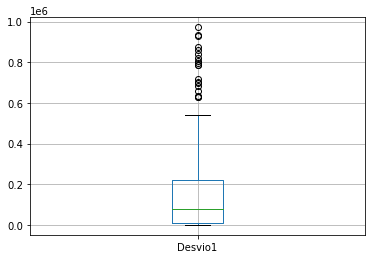

In [472]:
GastosMayorAlVigenteAcotadoA1M = df[ (
        ((df['Desvio1']) > 0) & ( df['Desvio1'] < 1000000))  ]
GastosMayorAlVigenteAcotadoA1M.boxplot(column='Desvio1')

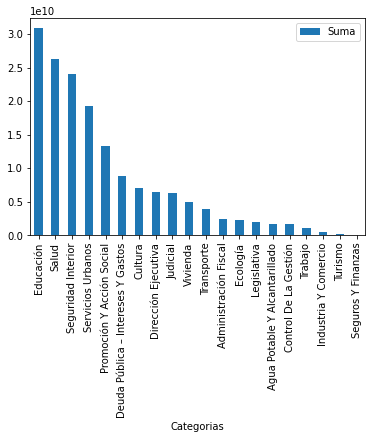

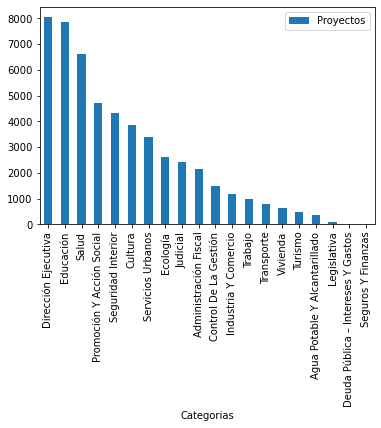

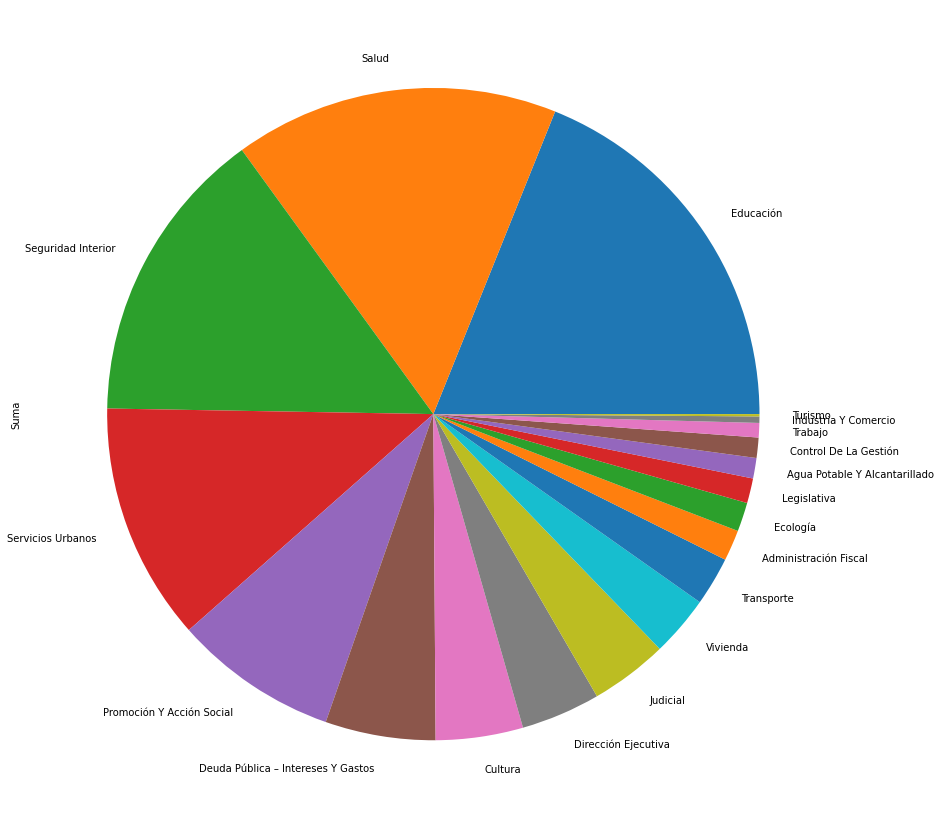

In [473]:
#PROYECTOS POR CATEGORIA
def sumCategory(inciso):
    return df[df.fun_desc == inciso].devengado.sum()

incisos = df.fun_desc.drop_duplicates()
result = map(sumCategory, incisos)
categoryCash = list(result)


finalData = {'Categorias': incisos,
            'Suma': categoryCash
            }
finalChart = pd.DataFrame(finalData, columns = ['Categorias', 'Suma']).sort_values('Suma',ascending=False)
finalChart.plot.bar(x='Categorias', y ='Suma')
print("\n\n\n")

def countCategory(inciso):
        return len(df[df.fun_desc == inciso])

proyectosPorCategoria = list(map(countCategory,incisos))

finalData2 = {'Categorias': incisos,
            'Proyectos': proyectosPorCategoria
            }

finalChart2 = pd.DataFrame(finalData2,
                           columns = ['Categorias', 'Proyectos']).sort_values('Proyectos',ascending=False)
finalChart2.plot.bar(x='Categorias', y ='Proyectos')

finalChartPie = pd.DataFrame(finalData, columns = ['Categorias', 'Suma'],
                          index=incisos).sort_values('Suma',ascending=False)
finalChartPie.plot.pie(y ='Suma', figsize=(15, 15),legend=False)

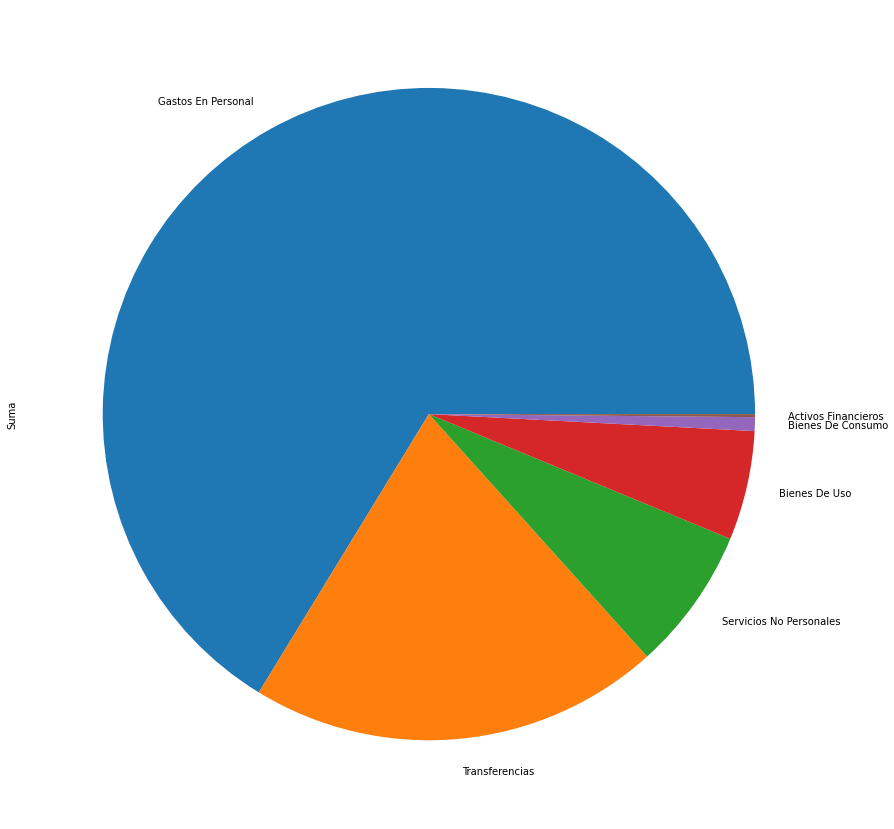

In [474]:
#DISCRIMINACION DE GASTOS EN INCISOS POR CATEGORIA
categoria = "Educación"
def sumInciso(inciso):
    return df[(df.inc_desc == inciso) & (df.fun_desc == categoria)].devengado.sum()

inc = df.inc_desc.drop_duplicates()
result2 = map(sumInciso, inc)
incisosGasto = list(result2)

finalIncisosData = {'Incisos': inc,
            'Suma': incisosGasto
            }

finalPieIncisos = pd.DataFrame(finalIncisosData,
                               columns = ['Incisos', 'Suma'],
                               index=inc).sort_values('Suma',ascending=False)
finalPieIncisos.plot.pie(y ='Suma', figsize=(15, 15),legend=False)

# Calcula cuantos y que ids estan duplicados en las distintas columnas

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('presupuesto-ejecutado-2018-tercer-trimestre.csv')

def verificar_repeticion_de_IDs(df, columna):
    df2=df.loc[:, [columna, columna + '_desc']]
    df2 = df2.drop_duplicates()
    filtro = df2.loc[:, [columna]].duplicated()    
    cantidad_repetidos = filtro.sum()
    if (cantidad_repetidos > 0):
        df2[filtro].sort_values(by=[columna]).to_csv(columna + '-' + str(cantidad_repetidos) + '.csv')
    else:
        print(columna + ' no tiene IDs repetidos.')

        
columnas = ['car','jur', 'sjur','ent','ue','prog','sprog','proy','ob','fin','fun','inc','ppal','par','spar',
            'eco','geo']
        

for columna in columnas:    
    verificar_repeticion_de_IDs(df, columna)

car no tiene IDs repetidos.
jur no tiene IDs repetidos.
ue no tiene IDs repetidos.
fin no tiene IDs repetidos.
inc no tiene IDs repetidos.
eco no tiene IDs repetidos.
geo no tiene IDs repetidos.
